# Solution underfit overfit


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
def model(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    print(f'\nmodel outcome for degree {degree}:')
    print(f'intercept: {lin_reg.intercept_} coefficient {lin_reg.coef_}')
    return [lin_reg, poly_features]


def predict(X, model, poly_features, n=1000):
    X_pred=np.linspace(X.min(), X.max(), n).reshape(n, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    return [X_pred, y_pred]


#4. Plot the points and the regression curve
def plot_polynomial(X,y,X_pred,y_pred):
    plt.plot(X, y, "b.", label = 'Data')
    plt.plot(X_pred, y_pred, "r-", linewidth=2, label="model trainset")
    plt.ylabel('Average Temperature')
    plt.xlabel('Year')
    plt.title('Average temperature in the Netherlands -  TRAIN')
    plt.legend()
    plt.show()


## Learning curve

In [11]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: trainingsdata
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation data")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     
    return 0


pipeline


In [5]:
degree = 2
Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

---
## Example

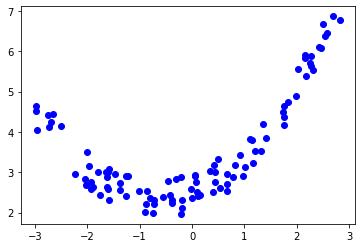

In [6]:
# Random data
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.4* x**2 + 0.5*x + 2 + np.random.rand(m, 1)
plt.scatter(x, y, color = 'b')

In [7]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

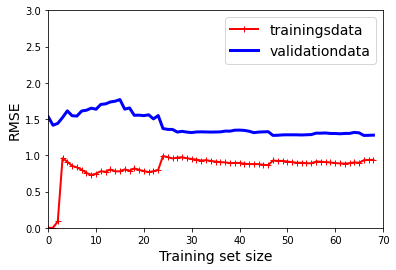

In [10]:
# model the data and plot the learning curve
degree = 1
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()


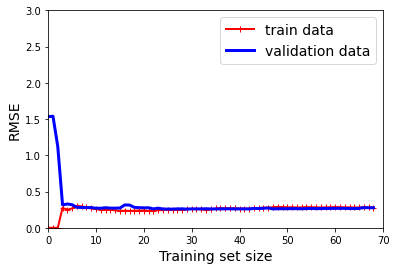

In [12]:
degree = 2
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()

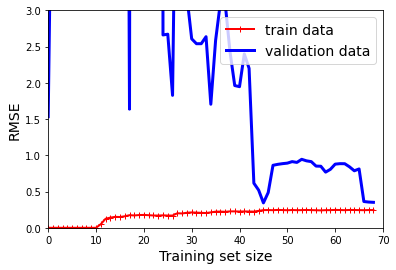

In [13]:
degree = 10
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()

---

# Assignment


### Load data

In [15]:
df= pd.read_csv('data/temperatuur.csv', header = None)
df.head()


,0,1
0,1760,9.379885
1,1761,9.426698
2,1762,9.411573
3,1763,9.401500
4,1764,9.386969


In [16]:
# prepare data
y = np.array(df[1]).reshape(-1,1)
X = np.array(df[0]).reshape(-1,1)


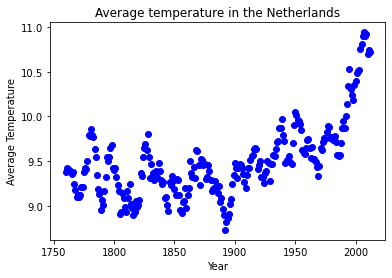

In [17]:
# Plot the data
plt.scatter(X, y, color = 'b')
plt.ylabel('Average Temperature')
plt.xlabel('Year')
plt.title('Average temperature in the Netherlands')
plt.show()

In [18]:
#3.normalize
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

#4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Model


model outcome for degree 2:
intercept: [9.28882411] coefficient [[0.23932511 0.2194434 ]]


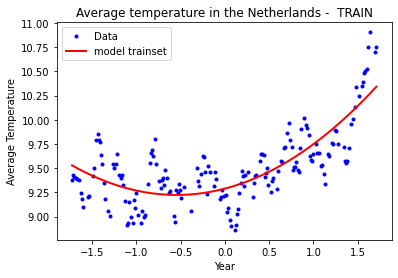

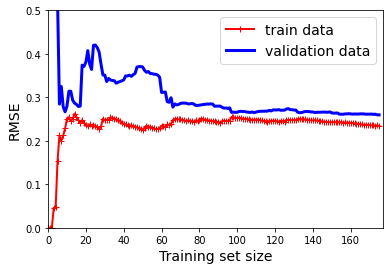

In [19]:
degree = 2

#moddelleer de data
lin_reg, poly_features = model(X_train, y_train, degree)

#plot de data en het model
X_pred, y_pred = predict(X_train, lin_reg, poly_features)
plot_polynomial(X_train,y_train,X_pred,y_pred)

#Plot de learning curve
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,0.5])
plt.show()




model outcome for degree 8:
intercept: [9.23128143] coefficient [[ 0.08291366  1.11301628  0.37391003 -1.61196521 -0.34978982  0.86155904
   0.09269429 -0.13887791]]


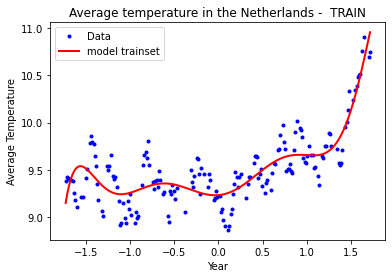

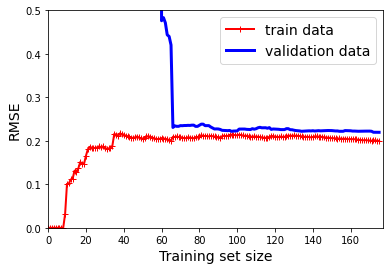

In [20]:
degree = 8

lin_reg, poly_features = model(X_train, y_train, degree)
X_pred, y_pred = predict(X_train, lin_reg, poly_features)
plot_polynomial(X_train,y_train,X_pred,y_pred)

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,0.5])
plt.show()



model outcome for degree 28:
intercept: [9.0960649] coefficient [[-2.21002999e+00  1.24902577e+01  6.10753578e+01 -1.64903105e+02
  -6.03372073e+02  1.03645865e+03  3.18103311e+03 -3.86407755e+03
  -1.00799540e+04  9.46613886e+03  2.04780255e+04 -1.58756472e+04
  -2.77954697e+04  1.85584004e+04  2.58642240e+04 -1.52572019e+04
  -1.67014341e+04  8.83477507e+03  7.46954818e+03 -3.57306131e+03
  -2.26886575e+03  9.85726656e+02  4.46495250e+02 -1.76496577e+02
  -5.13362992e+01  1.84629846e+01  2.61784147e+00 -8.55396323e-01]]


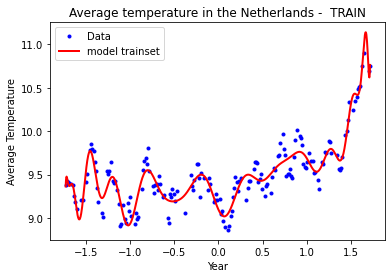

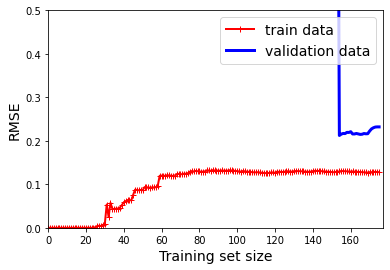

In [21]:
degree = 28

lin_reg, poly_features = model(X_train, y_train, degree)
X_pred, y_pred = predict(X_train, lin_reg, poly_features)
plot_polynomial(X_train,y_train,X_pred,y_pred)

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,0.5])
plt.show()

## Evaluate


The best model is problably an $N$ order model between 2 and 8 degrees. Despite that the second order has a bigger bias is has less variance